###data 불러오기 및 전처리

In [1]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/dataset/Mall_Customers.csv", index_col = 0)
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [2]:
from sklearn.preprocessing import StandardScaler
import numpy as np

#범주형 변수인 gender를 제외하고 scaling을 해준다
gender = pd.DataFrame(np.array(data.Gender), columns=["Gender"])
standard_scaler = StandardScaler()
data_scaled = pd.DataFrame(standard_scaler.fit_transform(data[['Age',"Annual Income (k$)","Spending Score (1-100)"]]), 
                    columns = ['Age',"Annual Income (k$)","Spending Score (1-100)"])


In [3]:
data_scaled['Gender'] = gender
data_scaled

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.424569,-1.738999,-0.434801,Male
1,-1.281035,-1.738999,1.195704,Male
2,-1.352802,-1.700830,-1.715913,Female
3,-1.137502,-1.700830,1.040418,Female
4,-0.563369,-1.662660,-0.395980,Female
...,...,...,...,...
195,-0.276302,2.268791,1.118061,Female
196,0.441365,2.497807,-0.861839,Female
197,-0.491602,2.497807,0.923953,Male
198,-0.491602,2.917671,-1.250054,Male


In [7]:
#
data_scaled = pd.get_dummies(data = data_scaled, columns = ['Gender'], prefix = ['Gender'])

In [8]:
data_scaled

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,-1.424569,-1.738999,-0.434801,0,1
1,-1.281035,-1.738999,1.195704,0,1
2,-1.352802,-1.700830,-1.715913,1,0
3,-1.137502,-1.700830,1.040418,1,0
4,-0.563369,-1.662660,-0.395980,1,0
...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,1,0
196,0.441365,2.497807,-0.861839,1,0
197,-0.491602,2.497807,0.923953,0,1
198,-0.491602,2.917671,-1.250054,0,1


In [9]:
data_scaled.isnull().sum()
#결측치는 없는것을 확인할 수 있다

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Gender_Female             0
Gender_Male               0
dtype: int64

In [10]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
data_scaled = pd.DataFrame(standard_scaler.fit_transform(data_scaled), columns=data_scaled.columns)

###hierarchical clustring

In [14]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import seaborn as sns

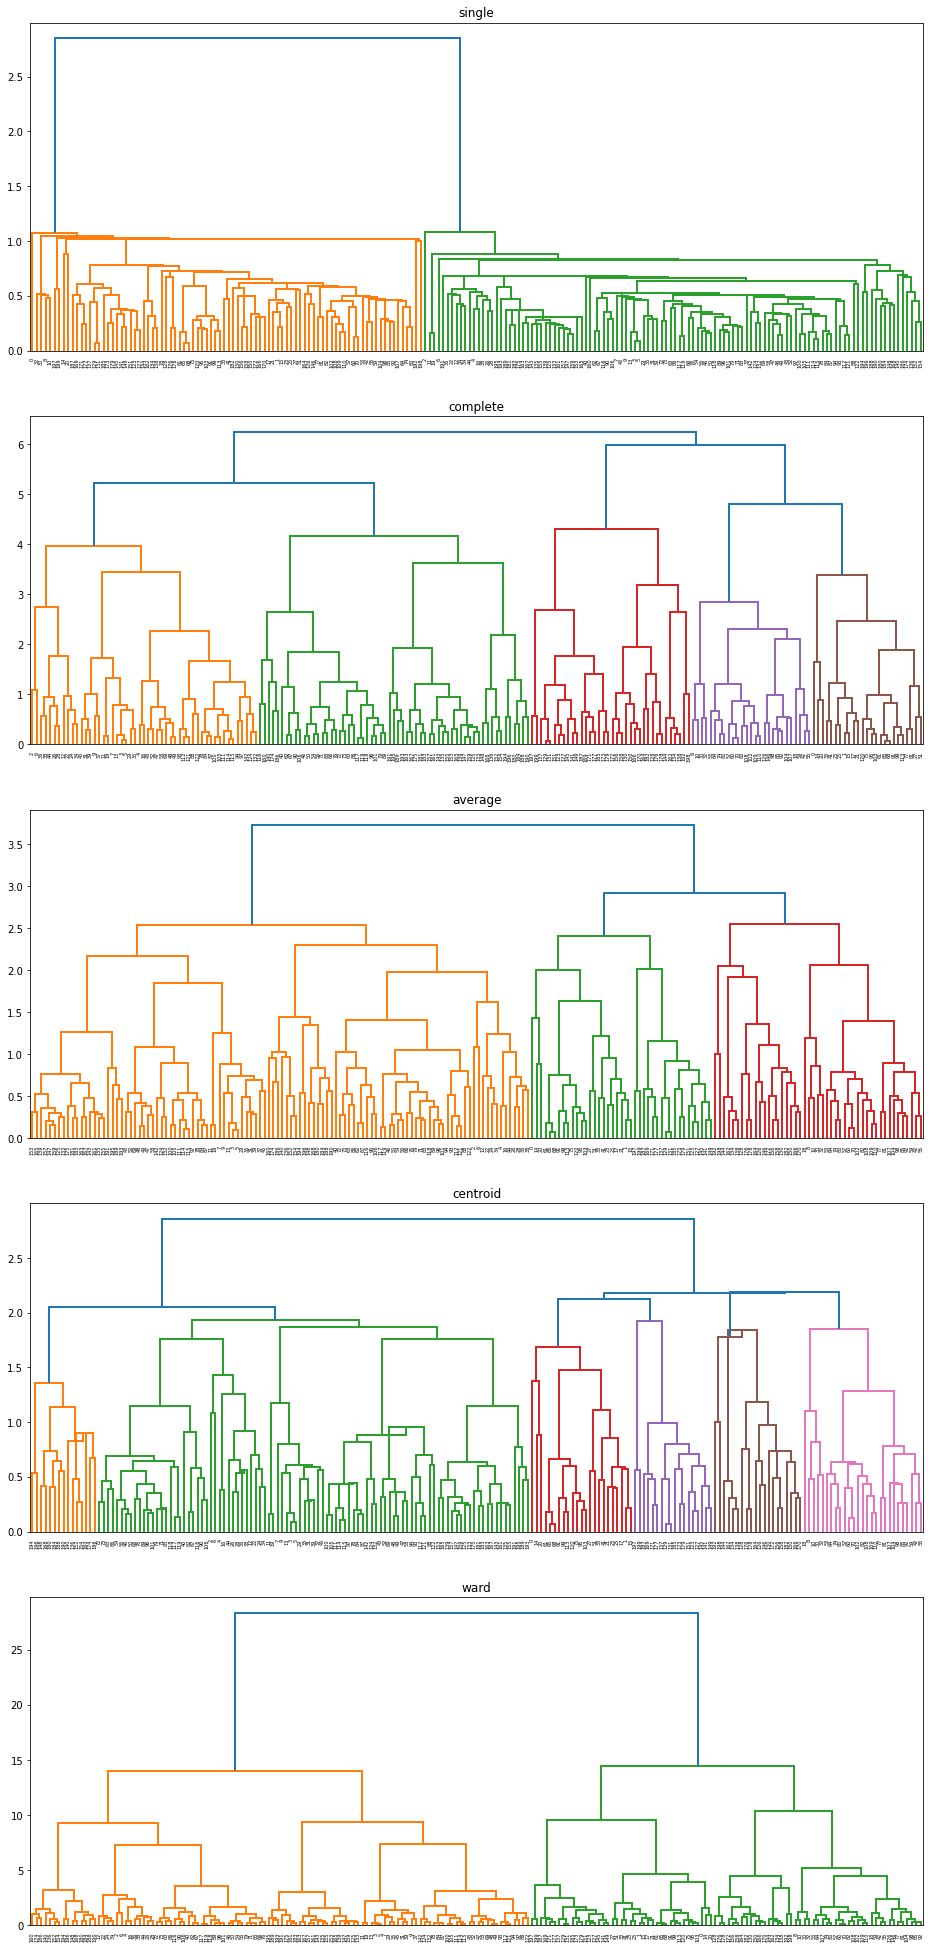

In [21]:
linkage_list = ['single', 'complete', 'average', 'centroid', 'ward']
data = data_scaled

fig, axes = plt.subplots(nrows=len(linkage_list), ncols=1, figsize=(16, 35))
for i in range(len(linkage_list)):
    for j in range(len(data)):
        hierarchical_single = linkage(data, method=linkage_list[i])
        dn = dendrogram(hierarchical_single, ax=axes[i])
        axes[i].title.set_text(linkage_list[i])
plt.show()

In [23]:
from sklearn.cluster import AgglomerativeClustering

#가장 균일하게 군집화가 이루어진 average로 클러스터링을 해보겠다
cls = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = cls.fit_predict(data_scaled)

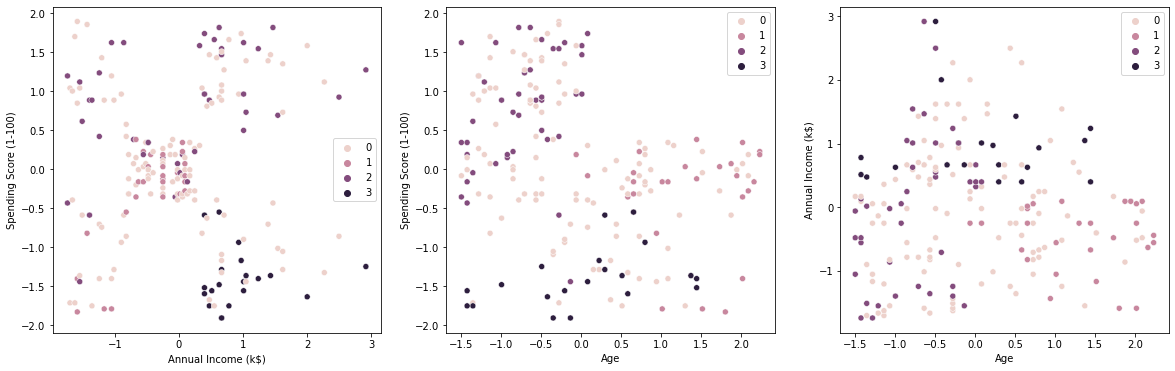

In [24]:
plt.figure(figsize=(20, 6))
plt.subplot(131)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data_scaled, hue=labels)

plt.subplot(132)
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=data_scaled, hue=labels)

plt.subplot(133)
sns.scatterplot(x='Age', y='Annual Income (k$)', data=data_scaled, hue=labels)

약간 불명확하게 클러스터링이 된 것을 확인할 수 있다

###k-means

Text(0.5, 1.0, 'Elbow plot (scaled data)')

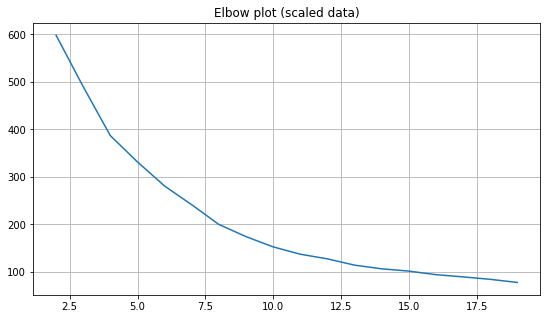

In [26]:
from sklearn.cluster import KMeans

# Elbow plot

fig = plt.figure( figsize = (20, 5) )

list_  = []
for k in range(2, 20):
    kmeans = KMeans( n_clusters = k )
    kmeans.fit( data_scaled )
    list_ .append( kmeans.inertia_ )

plt.subplot(1, 2, 2)               
plt.plot(range(2, 20), list_ )
plt.grid(True)
plt.title('Elbow plot (scaled data)')

k=4일때가 적절한 클러스터의 개수인 것을 알 수 있다

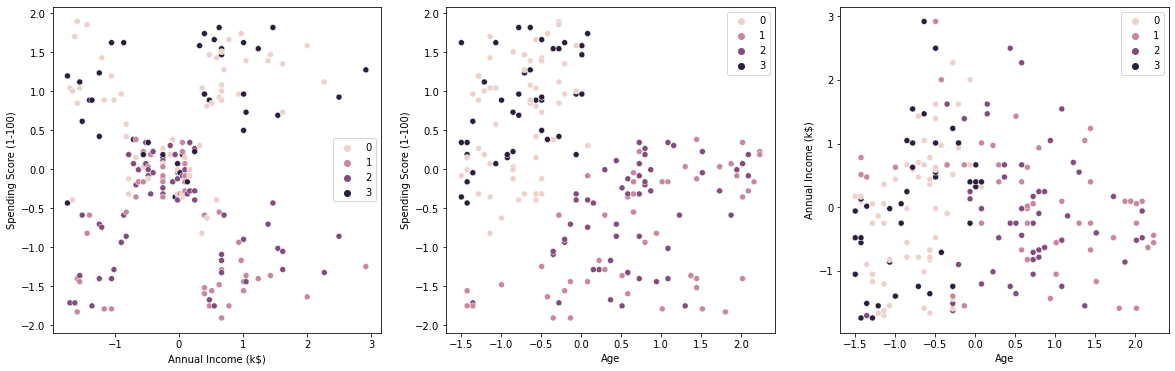

In [28]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_scaled)

plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)   
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data_scaled, hue=kmeans.labels_)

plt.subplot(1, 3, 2)   
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=data_scaled, hue=kmeans.labels_)

plt.subplot(1, 3, 3)   
sns.scatterplot(x='Age', y='Annual Income (k$)', data=data_scaled, hue=kmeans.labels_)

###dbscan

eps is 1.0792036945604635


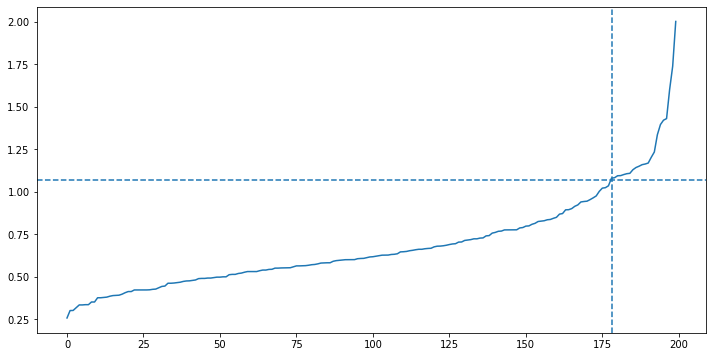

In [31]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=5)
neighbors.fit(data_scaled)
distances, indices = neighbors.kneighbors(data_scaled)

plt.figure(figsize=(12, 6))
plt.plot(np.sort(distances[:, 4]))
plt.axvline(178, 0, 2, ls='--')
plt.axhline(1.07, 0, 200, ls='--')
print("eps is", np.sort(distances[:, 4])[178] )

[-1  0  1]


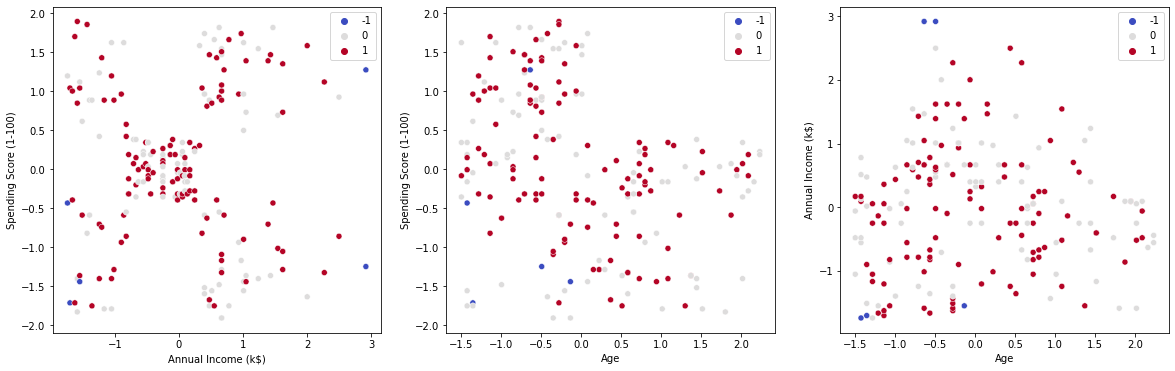

In [33]:
dbscan = DBSCAN(eps=1.07, min_samples=4) # scaling 하지 않은 데이터로 DBSCAN 학습
dbscan.fit(data)

print(np.unique(dbscan.labels_))

plt.figure(figsize=(20, 6))
plt.subplot(131)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data_scaled, hue=dbscan.labels_, palette='coolwarm')
plt.subplot(132)
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=data_scaled, hue=dbscan.labels_, palette='coolwarm')
plt.subplot(133)
sns.scatterplot(x='Age', y='Annual Income (k$)', data=data_scaled, hue=dbscan.labels_, palette='coolwarm')